#### Milestone I-V
#### Michael Perrine
#### DSC 540
#### Professor Williams


<h1><center>Milestone 1</center></h1>

# <h1><center>Market Analysis</center></h1>


The purpose of this analysis is to research market data. I will gather data from several sources. The goal is to analyze the effect of economic data on stock performance. I will also use the S&P 500 as the benchmark for my stock performance. The sources of my data will come from various sources. I will pull the stock data from FMP a stock price API. The web address for FMP is [Documentation V2 - API Reference | FMP](https://site.financialmodelingprep.com/developer/docs).  The economic data will come from the FRED. The FRED is managed by the St. louis Fed. The web address is Federal Reserve Economic Data | FRED | St. Louis Fed. Finally,  I will pull S&P data from Wikipedia. The web address is S&P 500 - Wikipedia.  Economic data will show a relationship between the stock data and the economy. And the S&P will show the relationship between the stock index and the market. 
	
The plan for my analysis will be to add the different data sets into one data frame. I will run an exploratory analysis on the data. I will need to transform the data and determine the variables that make the greatest impact on the analysis. It will be important for me to build graphs to determine the connection between the variables. After I build my charts, I can  run a regression analysis and test my model. For the regression analysis I will need to split my data into a training and a testing set. Along with any analysis there are challenges that I will have to manage. 

Some challenges that I can foresee are issues with combining the different data sets. Since I am working with data sets from multiple sources, I’ll have to make sure they are formatted appropriately. There may also be problems with loading the data into the program. The data will be stored in different formats, so I’ll have to ensure that they are formatted in a manner that is compatible across data sets. Another challenge that I can anticipate is overfitting the data. I need to make that the training and testing sets are not in danger of overfitting the data.

Ethical concerns are always a factor when manipulating data. It is important to implement safeguards to prevent ethical. One ethical concern is the  misrepresentation of the data. It is important that I don’t allow the data to misrepresent the results. Another ethical issue is bias. It’s important that I don’t allow my personal bias to cause me to see relationships that don’t exist. 
	


<h1><center>Milestone 2</center></h1>

The first series of code will load all the libraries for the analysis

In [3]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import yfinance as yf
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import requests 
import lxml
import warnings
import re
import csv
from financetoolkit import Toolkit
from dotenv import load_dotenv
import os
import sqlite3

In [4]:
warnings.filterwarnings('ignore')

1. Prep the flat files


The next series of code loads the data from the FRED. I will use three data sets for my analysis.
The first data set is the Coincident Economic Activity Index. This index measures the US economic condition. It takes into account non-farm payroll employment, the unemployment rate, average hours worked in manufacturing, and wages and salaries. The second data set is the Consumer Price Index. This measures the price changes of goods and services and is a leading indicator of inflation. The final data set from the FRED is the One Year T-Bill. Fluctuations in T-Bill rates indicate direction of the US Monetary Policy.

In [5]:
# This code loads in the cea data, creates a pandas dataframe, and displays the first 5 rows.
cea = pd.read_csv(r"coincident economic activity index.csv")
cea = pd.DataFrame(cea)
cea.head()

,observation_date,USPHCI
0,1/1/1979,45.36
1,2/1/1979,45.51
2,3/1/1979,45.75
3,4/1/1979,45.82
4,5/1/1979,46.05


In [6]:
# This code loads in the cpi data , creates a pandas dataframe, and displays the first 5 rows.
cpi = pd.read_csv(r"monthly cpi.csv")
cpi = pd.DataFrame(cpi)
cpi.head()

,observation_date,CPIAUCSL
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [7]:
# This code loads in the t-bill data , creates a pandas dataframe,and displays the first 5 rows.
t_bill = pd.read_csv(r"one year t-bill.csv")
t_bill = pd.DataFrame(t_bill)
t_bill.head()

,observation_date,TB1YR
0,7/1/1959,4.34
1,8/1/1959,4.31
2,9/1/1959,4.83
3,10/1/1959,4.69
4,11/1/1959,4.54


The next step is to combine the three data frames into one. This will give me the opportunity to do further analysis. The following series of codes will prep and combine the three data frames.

In [8]:
# The first line of code will store all three data frames into one object.
dfs = (cea, cpi, t_bill)

In [9]:
# The second line of code combines all the data into one new data frame.
new_data = reduce(lambda left, right: pd.merge(left, right, on = "observation_date", how = "outer"),dfs)


In [ ]:
# The third line of code renames the columns in the data frame and displays the completed data frame.
new_data = new_data.set_axis(["date", "cea", "cpi" , "t_bill"], axis=1)
new_data

Now that I have one data frame I want to reverse the order of the elements. Currently they are in ascending order. I want them in descending order that way when I add my stock data I'll see everything from the most current date to the oldest date.

In [ ]:
# This line of code reverses the order of the elements.
new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data


Now I want to view the data types in my data frame. It's important to make sure all the data types are appropriate for the elements. It looks like I need to change the date data type. It's listed as an object and should be listed as date/time.

In [ ]:
# This code displays the data type.
new_data.dtypes

In [ ]:
# This code displays the first five rows of the new_data data frame.
new_data.head()

In [ ]:
# This code changes the date data type from object to date/time and displays the result.
new_data["date"] = pd.to_datetime(new_data["date"],format='mixed')
new_data.dtypes

In [ ]:
# This code displays the new date format.
new_data.head()

In [ ]:
# This code drops NaN values. I chose to drop the. 
new_data_1 = new_data.dropna(how="any")
new_data_1

In [ ]:
# This code validates the dimensions of the cleaned data frame
new_data_1.shape

<h1><center>Milestone 3</center></h1>

In this section I am scraping data from Wikipedia. My goal is to extract the S&P500 table. To accomplish this goal I will use beautiful soup and requests to import the data. I will need to find the right html tags to create the desired table. The issue with source code is they are not always pretty or easy to work with. Challenges that I face are finding the right tags and dealing with missing or incomplete data.

In [18]:
# This code creates a url object.
url = 'https://en.wikipedia.org/wiki/S%26P_500'

In [19]:
# This code requests data from the website
data = requests.get(url)

In [ ]:
# This code extracts the html from wikipedia and displays it.
soup = BeautifulSoup(data.text, 'html.parser')
print(soup.prettify())

In [ ]:
# This code locates the desired table.
table = soup.find_all('table')[1]
table

In [ ]:
# This code parses the columns for the dataframe.
data_columns = soup.find_all('th')[10:20]
data_columns

In [ ]:
# This code cleans the column titles.
data_columns_titles = [title.text.strip() for title in data_columns]
data_columns_titles

In [24]:
# This code creates my empty data frame.
s_p_index = pd.DataFrame(columns=[data_columns_titles])

In [25]:
# I removed the annualized return over column because it is not needed for my analysis
s_p_index.drop(columns=['Annualized Return over'], inplace=True)

In [26]:
# This code displays the empty dataframe.
s_p_index

,Year,Change inIndex,"TotalAnnual Return,includingdividends","Value of $1.00invested onJanuary 1, 1970",5 years,10 years,15 years,20 years,25 years


In [27]:
# This code renames the columns
s_p_index.rename(columns={'Year':'year', 'Change inIndex':'change_in_index', 'TotalAnnual Return,includingdividends':'tot_ann_ret',
                'Value of $1.00invested onJanuary 1, 1970':'Value_of_1_invested_on_jan_1_1970',
                '5 years':'5_years', '10 years':'10_years', '15 years':'15_years','20 years':'20_years',
                '25 years':'25_years'}, inplace = True)

In [28]:
# this code displays the renamed columns.
s_p_index

,year,change_in_index,tot_ann_ret,Value_of_1_invested_on_jan_1_1970,5_years,10_years,15_years,20_years,25_years


In [ ]:
# This code locates all the row data for my S&P 500 table.
column_data = table.find_all('tr')
column_data

In [ ]:
# This code iterates through the rows to find the row data.
for row in column_data:
    row_data = row.find_all('td')
    
    ind_row_data = [data.text.strip() for data in row_data]
    print(ind_row_data)

After locating all the data for my analysis, I ran into a snag. I have empty lists in my data and was unable to append it to my empty data frame that I created earlier in the analysis. I tried to find a way to remove the empty lists and was unsuccessful. My solution is to append the list to a csv file and import the file to continue my preprocessing.

In [ ]:
# This code displays a list of my columns from my s_p_index dataframe.
s_p_index.columns

In [32]:
# This series of code creates my csv file and imports the data into the file.
csv_file= open('s_p_scrape.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['year','change_in_index',  'tot_ann_ret', 'Value_of_1_invested_on_jan_1_1970',
                    '5_years', '10_years', '15_years', '20_years', '25_years'])
for row in column_data[2:]:
    row_data = row.find_all('td')
    
    ind_row_data = [data.text.strip() for data in row_data]
    #print(ind_row_data)
    csv_writer.writerow(ind_row_data)
csv_file.close()


In [33]:
gspc = pd.read_csv('s_p_scrape.csv')

In [34]:
gspc = gspc.replace('-', np.nan)

In [35]:
gspc['change_in_index'] = gspc['change_in_index'].apply(lambda x: float(''.join(filter(str.isdigit, x)))if not x.isnumeric() else float(x))


In [ ]:
gspc.fillna(0)

In [ ]:
gspc.info()

<h1><center>Milestone 4</center></h1>

In [38]:
# This code creates load_dotenv.
load_dotenv()

True

In [39]:
# This code retrieves api key.
API_KEY=os.getenv("API_KEY")

In [40]:
# This code creates the list of companies for my stock data.
companies = Toolkit(['AAPL', 'MSFT', 'NVDA', 'JNJ', 'PG', 'JPM'], api_key=API_KEY, 
                    start_date= '2020-01-01')

In [41]:
# This code displays all columns in the data frame.
pd.set_option('display.max_columns', None)

In [ ]:
# This code retrieves the stock data from the FMP api.
historical_data = companies.get_historical_data(period='monthly')
historical_data

In [ ]:
# This code creates a subset with the adjusted close for the stocks.
stock_data = historical_data['Adj Close']
stock_data

<h1><center>Milestone 5</center></h1>

In this section I will import the three data sets into the SQLite3 database. I will need to construct three tables and append the tables with the respective data sets. Next I will join the data and create illustrations of the data.

In [44]:
# This code drops the date column
gspc.drop(columns=['year'], inplace=True)

In [ ]:
# This code drops the Value_of_1_invested_on_jan_1_1970 column
gspc.drop(columns=['Value_of_1_invested_on_jan_1_1970'], inplace=True)

In [46]:
# This code renames the following columns
gspc.rename(columns={'5_years': 'five'}, inplace=True)
gspc.rename(columns={'10_years': 'ten'}, inplace=True)
gspc.rename(columns={'15_years': 'fifteen'}, inplace=True)
gspc.rename(columns={'20_years': 'twenty'}, inplace=True)
gspc.rename(columns={'25_years': 'twenty_five'}, inplace=True)


In [ ]:
# This code drops the date 
new_data_1.drop(columns=['date'], inplace=True)

In [49]:
# This code creates the SQL database
conn = sqlite3.connect('stock_analysis.db')

In [50]:
# This code creates the cursor object
c = conn.cursor()

In [51]:
# This code builds the table for the dataframe
c.execute("CREATE TABLE IF NOT EXISTS stocks(id, aapl, msft, nvda, jnj, pg,jpm,benchmark )")

In [52]:
# This code commits the new table to the data frame
conn.commit()

In [53]:
# This code builds the table for the dataframe
c.execute("CREATE TABLE IF NOT EXISTS gspc(id, change_in_index, tot_ann_ret, five, ten, fifteen, twenty, twenty_five)")

In [54]:
# This code commits the new table to the data frame
conn.commit()

In [55]:
# This code builds the table for the dataframe
c.execute("CREATE TABLE IF NOT EXISTS eco_indicators(id, cea, cpi, t_bill )")

In [56]:
# This code commits the new table to the data frame
conn.commit()

In [57]:
# This code adds the dataframe to the sql database
stock_data.to_sql('stocks', conn, if_exists= 'append', index=False)

65

In [58]:
# This code commits the dataframe to the sql database
conn.commit()

In [59]:
# This code adds the dataframe to the sql database
gspc.to_sql('gspc', conn, if_exists= 'append', index=False)

64

In [60]:
# This code commits the dataframe to the sql database
conn.commit()

In [61]:
# This code adds the dataframe to the sql database
new_data_1.to_sql('eco_indicators', conn, if_exists= 'append', index=False)

475

In [62]:
# This code commits the dataframe to the sql database
conn.commit()

In [63]:
# This code creates the query to join two columns from the stock table and one column from the eco_indicators table
query = """
        SELECT *
        FROM stocks
        CROSS JOIN eco_indicators
        
        
        """

In [64]:
df = pd.read_sql_query(query, conn)

In [ ]:
# This code displays the first five rows of the joined data set
df.head()

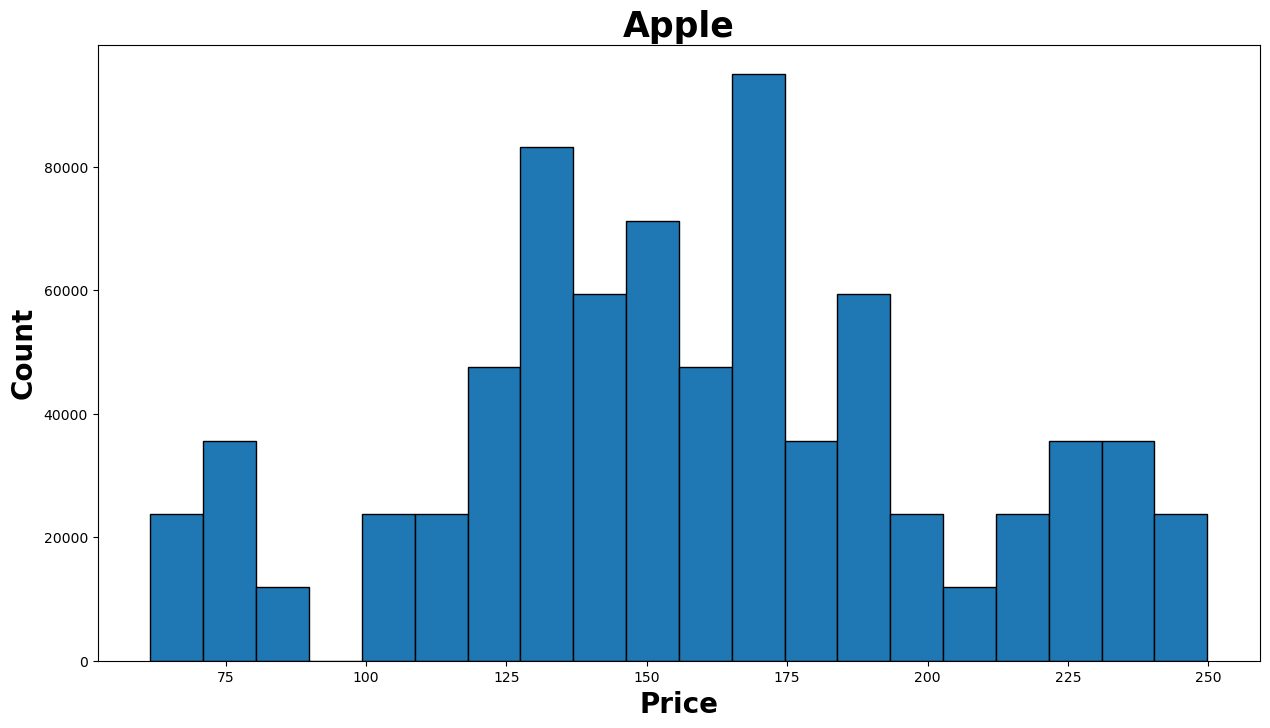

In [66]:
# Histogram of Apple prices
plt.figure(figsize=(15,8))
plt.hist(data=df, x='aapl', bins= 20, edgecolor= 'black')
plt.title('Apple',fontsize= 25, weight = 'bold')
plt.xlabel('Price', fontsize= 20, weight = 'bold')
plt.ylabel('Count', fontsize= 20, weight = 'bold')

plt.show()

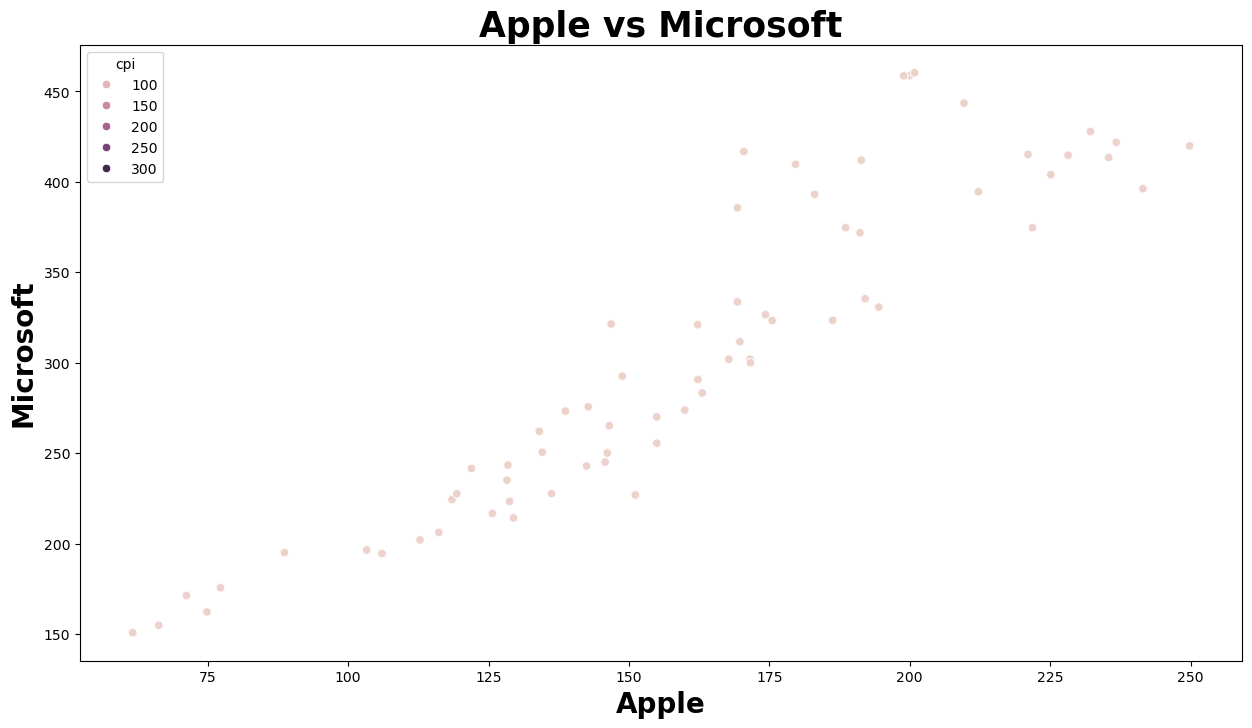

In [67]:
# Scatterplot of Apple and Microsoft prices
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='aapl', y='msft', hue='cpi')
plt.title('Apple vs Microsoft',fontsize= 25, weight = 'bold')
plt.xlabel('Apple', fontsize= 20, weight = 'bold')
plt.ylabel('Microsoft', fontsize= 20, weight = 'bold')

plt.show()

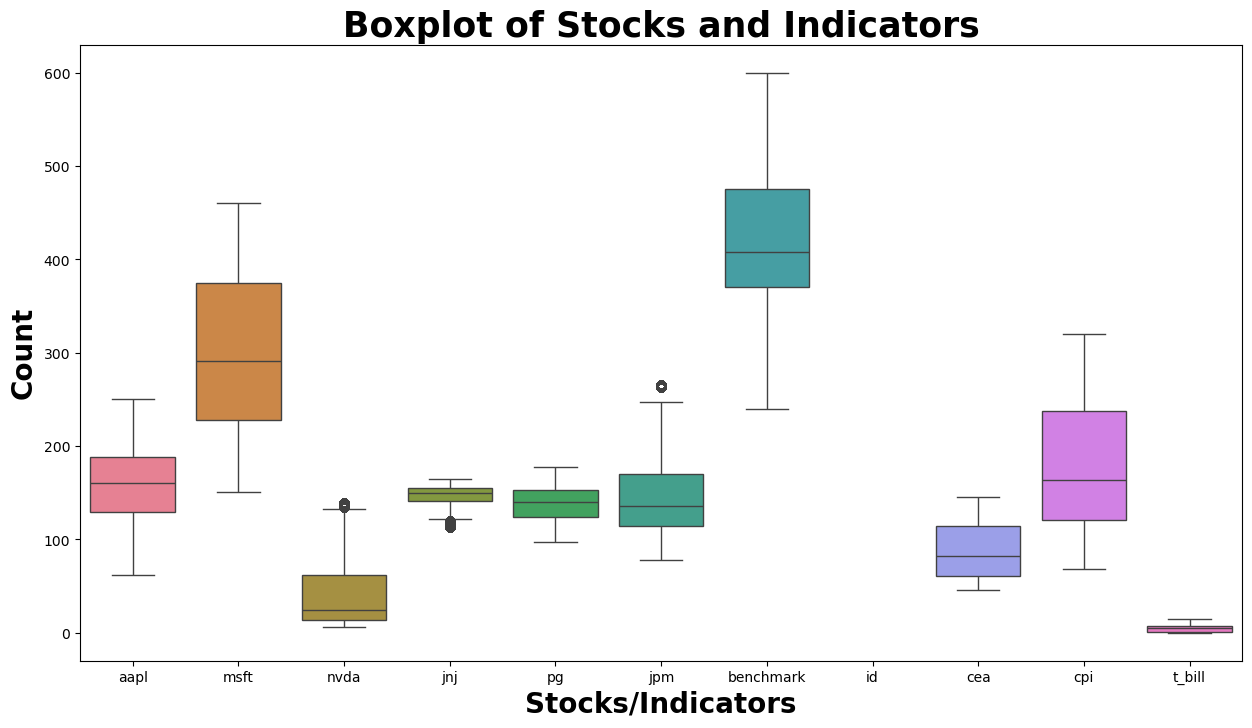

In [68]:
# boxplot of df
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title('Boxplot of Stocks and Indicators',fontsize= 25, weight = 'bold')
plt.xlabel('Stocks/Indicators', fontsize= 20, weight = 'bold')
plt.ylabel('Count', fontsize= 20, weight = 'bold')

plt.show()

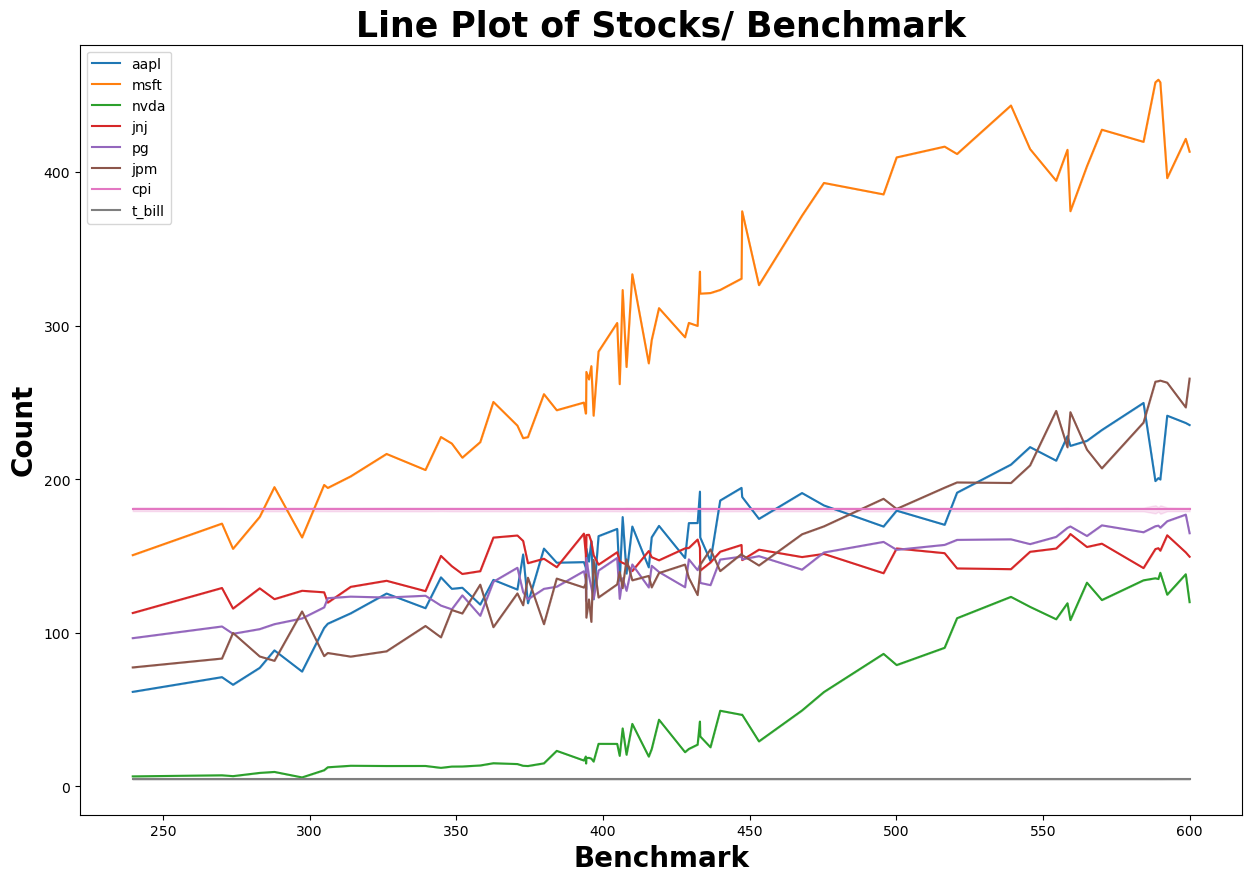

In [76]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='benchmark', y='aapl', label='aapl')
sns.lineplot(data=df, x='benchmark', y='msft', label='msft')
sns.lineplot(data=df, x='benchmark', y='nvda', label='nvda')
sns.lineplot(data=df, x='benchmark', y='jnj', label='jnj')
sns.lineplot(data=df, x='benchmark', y='pg', label='pg')
sns.lineplot(data=df, x='benchmark', y='jpm', label='jpm')
sns.lineplot(data=df, x='benchmark', y='cpi', label='cpi')
sns.lineplot(data=df, x='benchmark', y='t_bill', label='t_bill')
plt.title('Line Plot of Stocks/ Benchmark',fontsize= 25, weight = 'bold')
plt.xlabel('Benchmark', fontsize= 20, weight = 'bold')
plt.ylabel('Count', fontsize= 20, weight = 'bold')
plt.legend()
plt.show()

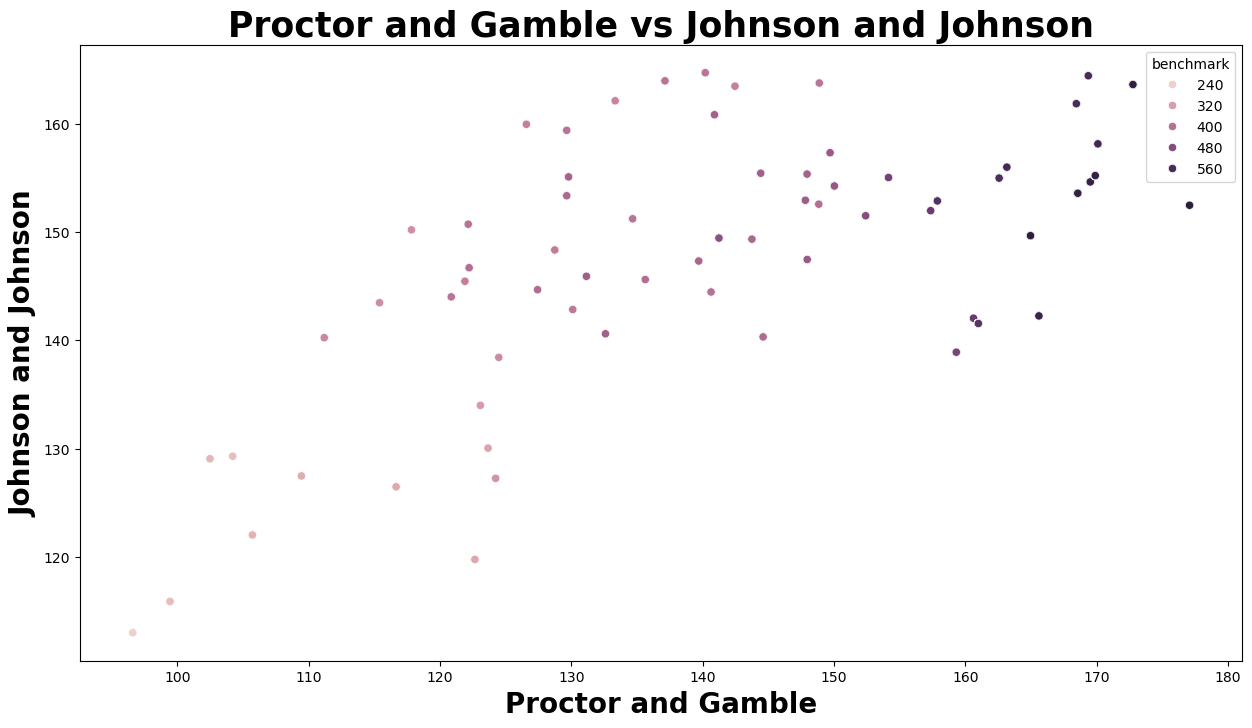

In [75]:
# Scatterplot of Apple and Microsoft prices
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='pg', y='jnj', hue='benchmark')
plt.title('Proctor and Gamble vs Johnson and Johnson',fontsize= 25, weight = 'bold')
plt.xlabel('Proctor and Gamble', fontsize= 20, weight = 'bold')
plt.ylabel('Johnson and Johnson', fontsize= 20, weight = 'bold')

plt.show()

In [79]:
conn.close()

<h1><center>Conclusion</center></h1>

My first data was acquired from the FRED. I utilized three different data sets that I combined into one data frame. To accomplish this, I used a lambda function and joined all data sets on the observation date. After combining the three data sets, I chose to rename the columns and adjusted the date to descending order. The final step was to remove the nan values. Removing the nan values was a good option because I am only interested in the most recent twenty-five years. 

My second data set , the S&P, came from Wikipedia. With the S&P I used the beautiful soup and request packages to scrape Wikipedia. When I pulled the HTML from Wikipedia, I needed to isolate the table and extract columns and rows. Once this data was isolated, I needed to construct a data frame to hold the information. This proved to be a problem. When I extracted the data from Wikipedia, I learned the table had empty lists embedded in the data. To solve this, I exported the data to a csv file, removed the empty rows and imported the new file into my program. 

The final data source came from FMP Api. This data came in relatively clean. The stock data that I pulled contained the open, close, high, low, and adjusted close data. For my analysis I am only concerned with the adjusted close for each stock. I created a data set that consisted of the adjusted close for the stocks that I pulled from the Api. 

The next step is to import all the data sets into a database. I chose to use SQLite3 database. This option satisfied my needs and is a feature of the python program. I created three tables and imported the data into their respective tables. Next, I joined two of the three tables. The S&P data wouldn’t join to the economic indicators and stock data sets. With the combined data sets I created some visualizations. I created five graphs.
 
 The first graph is a histogram of Apple. This graph showed the highest interest when the stock was priced between 160-175. The second graph is a scatter plot that compares two stocks, Apple and Microsoft. This graph shows a positive correlation between the two stocks. In the third graph I constructed a boxplot of the stocks and the economic indicators. The interesting thing about this graph is the lack of outliers. The only stocks with outliers are JP Morgan, Nvidia, and Johnson and Johnson. The fourth graph is a line plot that compares the stocks ad the economic indicators. We saw some expected relationships in the data. The one that was surprising was how JP Morgan closely tracked Apple. In the final graph I created a scatter plot comparing Proctor and Gamble with Johnson and Johnson. There was a relationship, however it wasn’t as strong as I would’ve expected. 

In the scope of my analysis I think the biggest ethical concern is misrepresenting data. It is important to never allow personal bias or improper scaling to give improper perceptions regarding the data that I’m using. To avoid this I ensured that any transformations to my data were minimal and didn’t alter the figures that I acquired from the various sources. 

